In [6]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0
    Uninstalling pip-23.0:
      Successfully uninstalled pip-23.0


In [21]:
# Install pybaseball
!pip install git+https://github.com/jldbc/pybaseball.git


  Cloning https://github.com/jldbc/pybaseball.git to /private/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/pip-req-build-_y38qry4
  Running command git clone --filter=blob:none --quiet https://github.com/jldbc/pybaseball.git /private/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/pip-req-build-_y38qry4
  Resolved https://github.com/jldbc/pybaseball.git to commit fd6c4e4bb6135604829e46d686f240ee2bd07194
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pybaseball: filename=pybaseball-2.2.5-py3-none-any.whl size=424482 sha256=46933a7b52ac9d15fd599f7e42362691a4d82edd3994f6856e38b5881a4bd9e3
  Stored in directory: /private/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/pip-ephem-wheel-cache-wd0hn5kq/wheels/b7/0a/c9/e91e705f5cb8a0f41bb81a6307b46ceda26d608ffcae73795e
Successfully built pybaseball
  Attempting uninstall: pybaseball
    Found existing installation: pybaseball 2.2.1
   

In [32]:
from pybaseball import statcast
from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher_spin
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
# Player ID 
steele_id = 657006
#playerid_lookup('steele', 'justin')
# 2023 Season Data for Steele
data_23 = statcast_pitcher('2023-01-01', '2023-05-11', player_id=steele_id)

Gathering Player Data


In [25]:
# Inspect Steele's 2023 data
data_23.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2023-05-10,90.8,2.08,6.01,"Steele, Justin",668800,657006,grounded_into_double_play,hit_into_play,NaN,NaN,NaN,NaN,1.0,"Andrew Knizner grounds into a double play, sho...",R,R,L,CHC,STL,X,6.0,ground_ball,0,0,2023,-0.07,0.74,-0.37,2.79,NaN,657557.0,663457.0,1,6,Top,111.18,149.37,NaN,...,137.0,98.5,7.0,91.2,2384.0,6.5,718221,657006,543228,641820,663611,621550,621020,664023,641355,673548,54.02,0.611,0.565,0.0,1.0,0.0,0.0,4.0,51,1,4-Seam Fastball,6,3,3,6,3,6,3,6,Standard,Standard,165.0,0.092,-0.625
1,FF,2023-05-10,93.6,1.71,6.00,"Steele, Justin",663457,657006,single,hit_into_play,NaN,NaN,NaN,NaN,5.0,Lars Nootbaar singles on a sharp line drive to...,R,L,L,CHC,STL,X,8.0,line_drive,2,2,2023,-0.11,0.81,0.03,2.73,NaN,660766.0,657557.0,1,6,Top,114.60,81.59,NaN,...,231.0,103.9,12.0,94.1,2198.0,6.3,718221,657006,543228,641820,663611,621550,621020,664023,641355,673548,54.20,0.911,0.917,0.9,1.0,1.0,0.0,4.0,50,5,4-Seam Fastball,6,2,2,6,3,6,3,6,Standard,Standard,151.0,-0.068,0.981
2,SL,2023-05-10,84.7,1.69,6.08,"Steele, Justin",663457,657006,NaN,ball,NaN,NaN,NaN,NaN,13.0,Lars Nootbaar singles on a sharp line drive to...,R,L,L,CHC,STL,B,NaN,NaN,1,2,2023,-1.47,0.02,-1.12,2.15,NaN,660766.0,657557.0,1,6,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,84.5,1904.0,6.1,718221,657006,543228,641820,663611,621550,621020,664023,641355,673548,54.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,4,Slider,6,2,2,6,2,6,2,6,Standard,Standard,255.0,0.000,0.030
3,SL,2023-05-10,84.9,1.63,6.02,"Steele, Justin",663457,657006,NaN,ball,NaN,NaN,NaN,NaN,13.0,Lars Nootbaar singles on a sharp line drive to...,R,L,L,CHC,STL,B,NaN,NaN,0,2,2023,-1.43,0.05,-1.26,0.99,NaN,660766.0,657557.0,1,6,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,84.7,2757.0,6.3,718221,657006,543228,641820,663611,621550,621020,664023,641355,673548,54.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,3,Slider,6,2,2,6,2,6,2,6,Standard,Standard,315.0,0.000,0.106
4,FF,2023-05-10,93.2,1.79,6.00,"Steele, Justin",663457,657006,NaN,foul,NaN,NaN,NaN,NaN,5.0,Lars Nootbaar singles on a sharp line drive to...,R,L,L,CHC,STL,S,NaN,NaN,0,1,2023,-0.06,0.99,0.16,2.21,NaN,660766.0,657557.0,1,6,Top,NaN,NaN,NaN,...,103.0,73.9,16.0,93.8,2442.0,6.4,718221,657006,543228,641820,663611,621550,621020,664023,641355,673548,54.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,2,4-Seam Fastball,6,2,2,6,2,6,2,6,Standard,Standard,154.0,0.000,-0.107


In [57]:
# Inspect relationship between Pitch Type & Run Value
steele_pitch_velo = data_23[['pitch_name', 'effective_speed', 'inning', 'delta_run_exp']]
steele_pitch_velo.dropna()
grouped_df = steele_pitch_velo.groupby(['pitch_name', 'inning']).mean().reset_index()

In [101]:
# All of Steele's Pitches
# 2023 Season Data for Steele
data_steele = statcast_pitcher('2021-01-01', '2022-11-11', player_id=steele_id)
total_steele = data_steele[['pitch_name', 'effective_speed', 'inning', 'delta_run_exp']]


Gathering Player Data


In [102]:
total_steele.dropna(inplace=True)
total_grouped = total_steele.groupby(['pitch_name', 'inning']).mean().reset_index()

/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/ipykernel_22034/1963546986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_steele.dropna(inplace=True)


In [103]:
total_grouped.head()
total_grouped.shape

(39, 4)

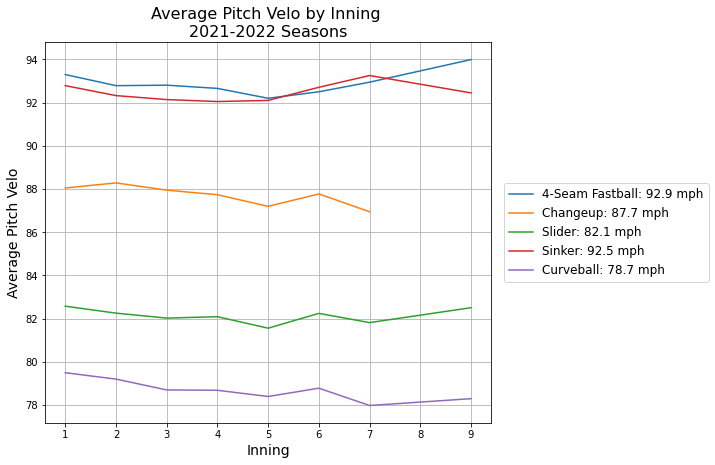

In [108]:
fig, ax = plt.subplots(figsize = (8,7))
for pitch in total_steele['pitch_name'].unique():
    pitches = total_grouped[total_grouped['pitch_name'] == pitch]
    plt.plot(pitches['inning'], pitches['effective_speed'], label = f'{pitch}: {pitches.effective_speed.mean():.1f} mph')

plt.title("Average Pitch Velo by Inning \n2021-2022 Seasons", fontsize=16)
plt.xlabel("Inning", fontsize=14)
plt.ylabel("Average Pitch Velo", fontsize=14)
plt.legend(loc = 'center right', bbox_to_anchor=(1.5,.5), fontsize=12)
ax.grid(True)
plt.show()

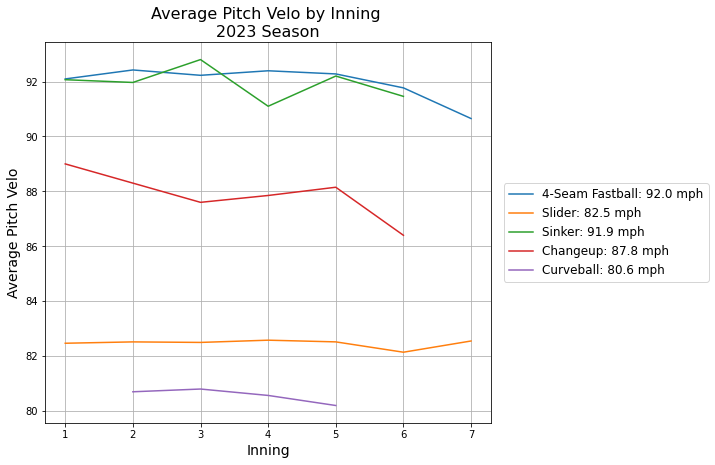

In [109]:

fig, ax = plt.subplots(figsize = (8,7))
for pitch in steele_pitch_velo['pitch_name'].unique():
    pitch_data = grouped_df[grouped_df['pitch_name'] == pitch]
    plt.plot(pitch_data['inning'], pitch_data['effective_speed'], label = f'{pitch}: {pitch_data.effective_speed.mean():.1f} mph')

plt.title("Average Pitch Velo by Inning \n2023 Season", fontsize = 16)
plt.xlabel("Inning", fontsize=14)
plt.ylabel("Average Pitch Velo", fontsize=14)
plt.legend(loc = 'center right', bbox_to_anchor=(1.5,.5), fontsize=12)
ax.grid(True)
plt.show()


In [82]:
steele_fb_velo = data_23
steele_fb_velo = steele_fb_velo[steele_fb_velo['pitch_name'] == '4-Seam Fastball']

In [85]:
steele_fb_velo = steele_fb_velo[["pitch_name", "effective_speed", "delta_run_exp"]]
steele_fb_velo

,pitch_name,effective_speed,delta_run_exp
0,4-Seam Fastball,91.2,-0.625
1,4-Seam Fastball,94.1,0.981
4,4-Seam Fastball,93.8,-0.107
6,4-Seam Fastball,93.9,0.598
8,4-Seam Fastball,92.9,0.028
...,...,...,...
721,4-Seam Fastball,91.6,0.038
722,4-Seam Fastball,91.5,0.148
723,4-Seam Fastball,91.7,0.137
724,4-Seam Fastball,91.7,0.069


In [110]:
# Round effective speed
steele_fb_velo['effective_speed'] = steele_fb_velo['effective_speed'].round(0)

In [111]:
steele_fb_velo

,pitch_name,effective_speed,delta_run_exp
0,4-Seam Fastball,91.0,-0.625
1,4-Seam Fastball,94.0,0.981
4,4-Seam Fastball,94.0,-0.107
6,4-Seam Fastball,94.0,0.598
8,4-Seam Fastball,93.0,0.028
...,...,...,...
721,4-Seam Fastball,92.0,0.038
722,4-Seam Fastball,92.0,0.148
723,4-Seam Fastball,92.0,0.137
724,4-Seam Fastball,92.0,0.069


In [112]:
# Group 2023 fastball data
steele_fb_velo_grouped = steele_fb_velo.groupby('effective_speed')['delta_run_exp'].sum().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


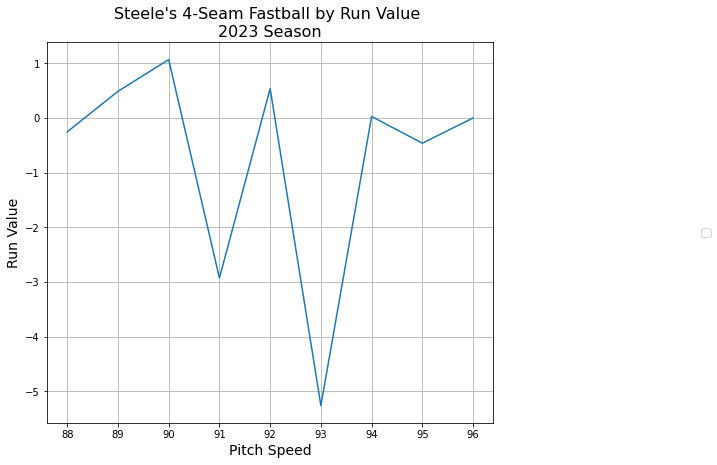

In [114]:
# Plot 2023 Fastball data and RV
fig, ax = plt.subplots(figsize = (8,7))

plt.plot(steele_fb_velo_grouped['effective_speed'], steele_fb_velo_grouped['delta_run_exp'])
plt.title("Steele's 4-Seam Fastball by Run Value \n2023 Season", fontsize = 16)
plt.xlabel("Pitch Speed", fontsize=14)
plt.ylabel("Run Value", fontsize=14)
plt.legend(loc = 'center right', bbox_to_anchor=(1.5,.5), fontsize=12)
ax.grid(True)
plt.show()